# Week 14 Activity
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $10 million.The # significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. How will you help this NGO to make a correct decision based on socioeconomic and health factors?

In [1]:
#Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read the dataset to the python environment.

In [4]:
data=pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
data.shape

(167, 10)

In [6]:
X=data.iloc[:,1:10]
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
#Preprocessing steps

In [8]:
X.shape

(167, 9)

In [9]:
X.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
X.dtypes

child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [11]:
X.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [12]:
#Standard Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
columns=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
sc = StandardScaler()
X = sc.fit_transform(X)
scaled_data=pd.DataFrame(X, columns = columns)
scaled_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


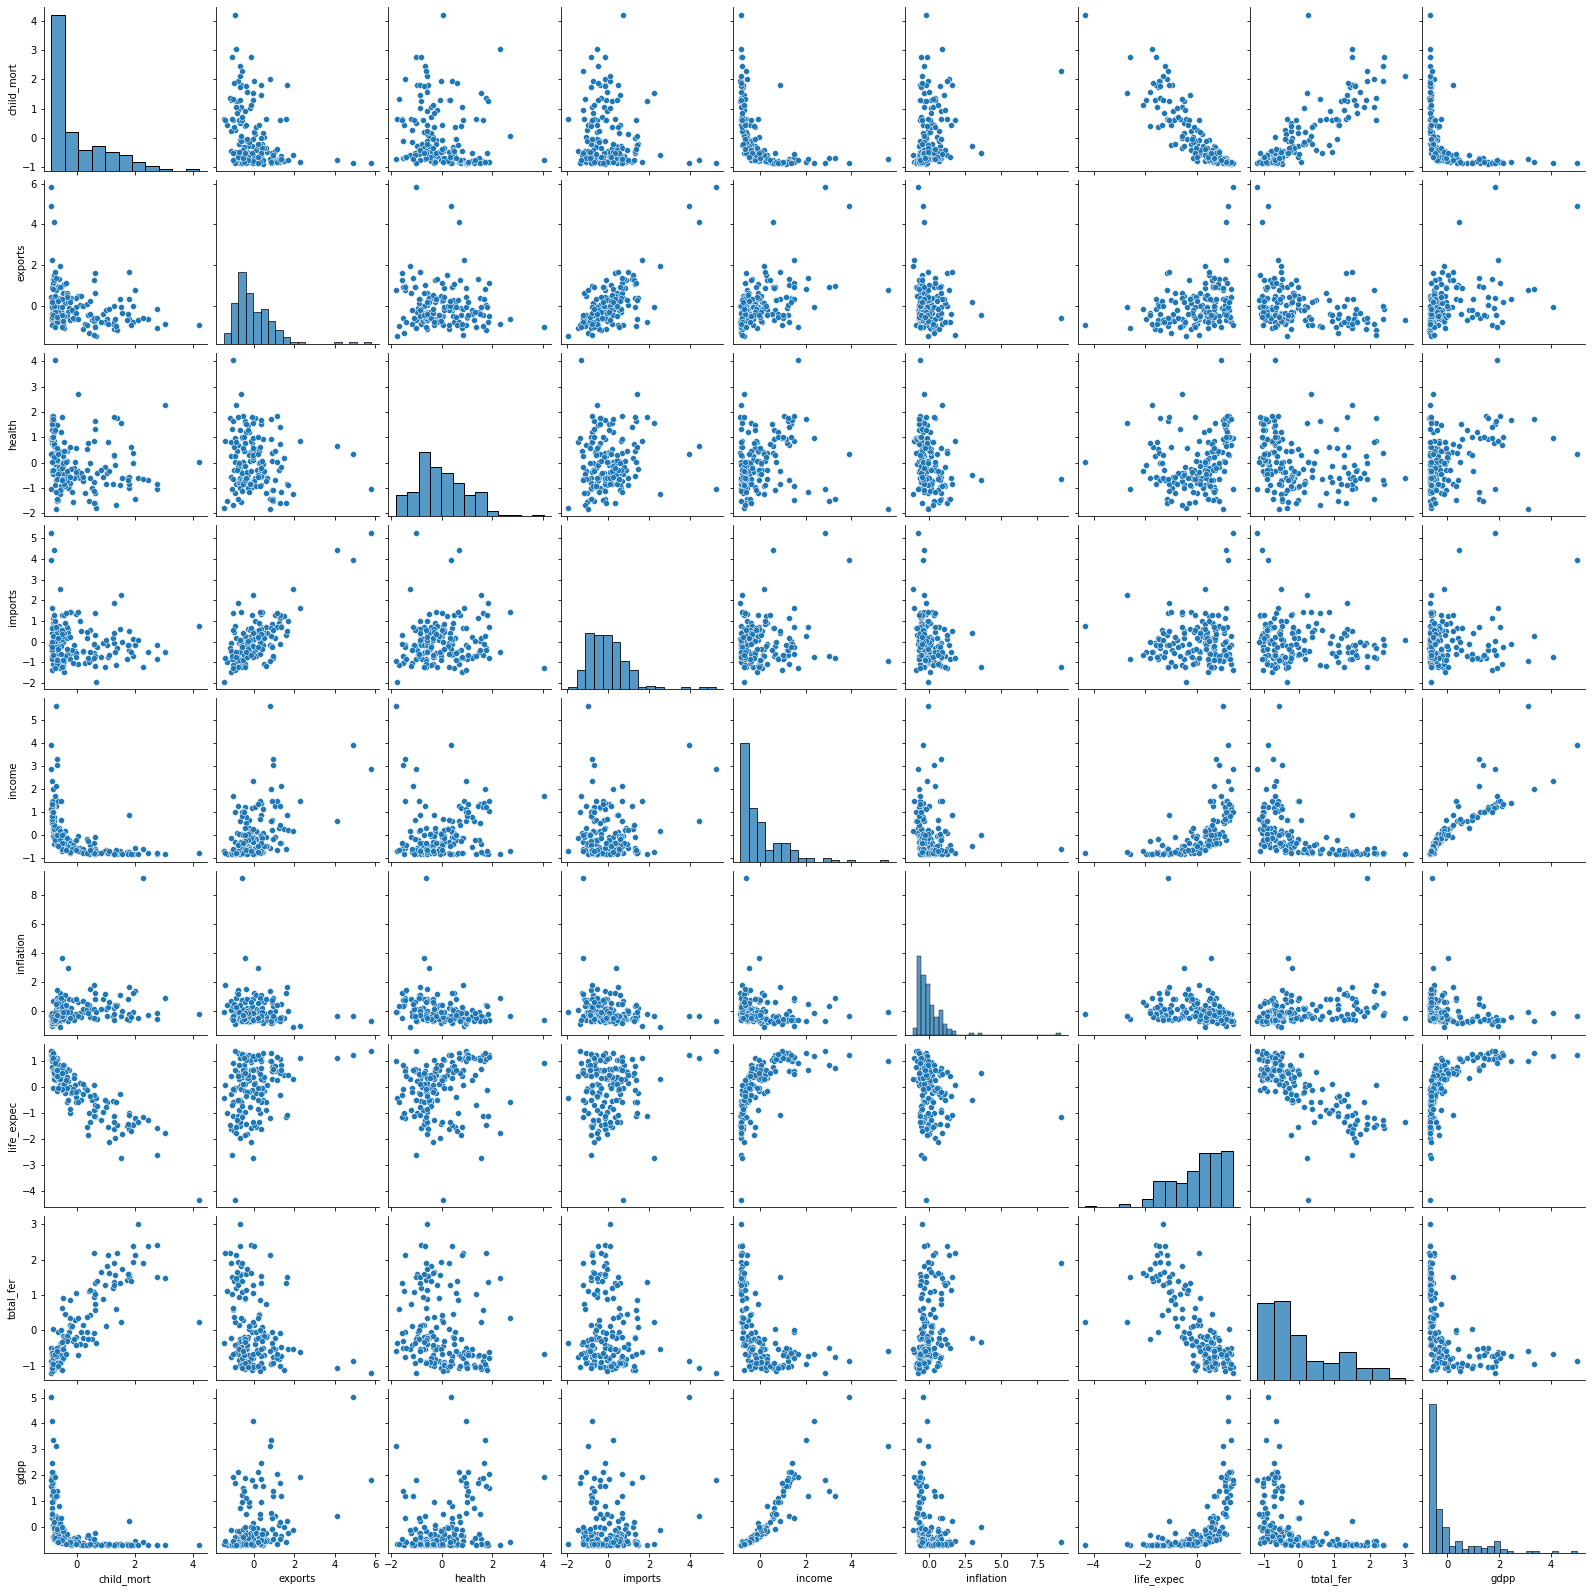

In [14]:
sns.pairplot(scaled_data)

In [15]:
#KMeans Clustering

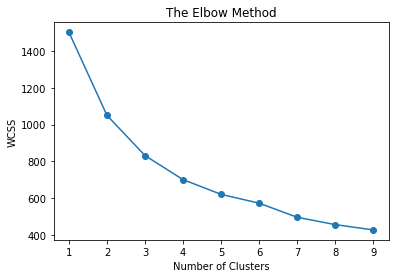

In [16]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
#Using Elbow Method to find optimal number of clusters

In [18]:
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(scaled_data)
y_kmeans

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [19]:
data['cluster_number']=y_kmeans
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_number
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


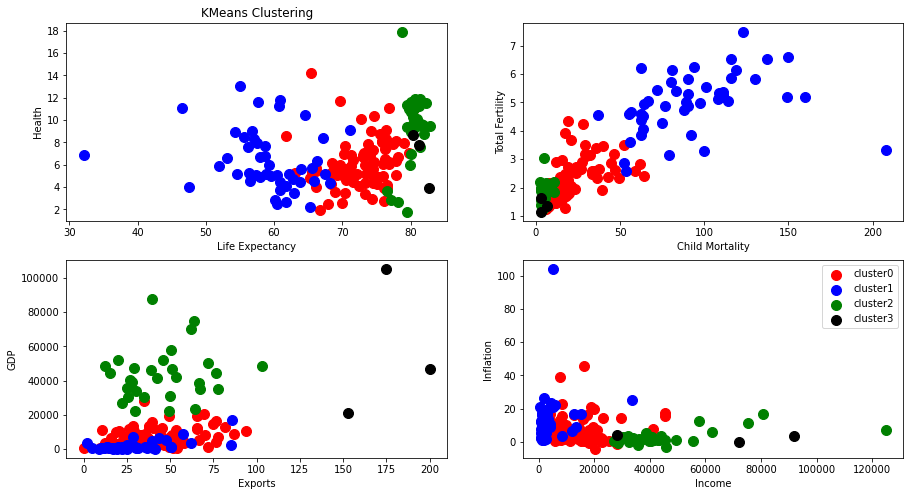

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.scatter(data[data['cluster_number']==0]['life_expec'],data[data['cluster_number']==0]['health'],s=100,c='red',label='cluster0')
plt.scatter(data[data['cluster_number']==1]['life_expec'],data[data['cluster_number']==1]['health'],s=100,c='blue',label='cluster1')
plt.scatter(data[data['cluster_number']==2]['life_expec'],data[data['cluster_number']==2]['health'],s=100,c='green',label='cluster2')
plt.scatter(data[data['cluster_number']==3]['life_expec'],data[data['cluster_number']==3]['health'],s=100,c='black',label='cluster3')

plt.title('KMeans Clustering')
plt.xlabel('Life Expectancy')
plt.ylabel('Health')

plt.subplot(2,2,2)
plt.scatter(data[data['cluster_number']==0]['child_mort'],data[data['cluster_number']==0]['total_fer'],s=100,c='red',label='cluster0')
plt.scatter(data[data['cluster_number']==1]['child_mort'],data[data['cluster_number']==1]['total_fer'],s=100,c='blue',label='cluster1')
plt.scatter(data[data['cluster_number']==2]['child_mort'],data[data['cluster_number']==2]['total_fer'],s=100,c='green',label='cluster2')
plt.scatter(data[data['cluster_number']==3]['child_mort'],data[data['cluster_number']==3]['total_fer'],s=100,c='black',label='cluster3')

plt.xlabel('Child Mortality')
plt.ylabel('Total Fertility')

plt.subplot(2,2,3)
plt.scatter(data[data['cluster_number']==0]['exports'],data[data['cluster_number']==0]['gdpp'],s=100,c='red',label='cluster0')
plt.scatter(data[data['cluster_number']==1]['exports'],data[data['cluster_number']==1]['gdpp'],s=100,c='blue',label='cluster1')
plt.scatter(data[data['cluster_number']==2]['exports'],data[data['cluster_number']==2]['gdpp'],s=100,c='green',label='cluster2')
plt.scatter(data[data['cluster_number']==3]['exports'],data[data['cluster_number']==3]['gdpp'],s=100,c='black',label='cluster3')


plt.xlabel('Exports')
plt.ylabel('GDP')

plt.subplot(2,2,4)
plt.scatter(data[data['cluster_number']==0]['income'],data[data['cluster_number']==0]['inflation'],s=100,c='red',label='cluster0')
plt.scatter(data[data['cluster_number']==1]['income'],data[data['cluster_number']==1]['inflation'],s=100,c='blue',label='cluster1')
plt.scatter(data[data['cluster_number']==2]['income'],data[data['cluster_number']==2]['inflation'],s=100,c='green',label='cluster2')
plt.scatter(data[data['cluster_number']==3]['income'],data[data['cluster_number']==3]['inflation'],s=100,c='black',label='cluster3')


plt.xlabel('Income')
plt.ylabel('Inflation')

plt.legend()
plt.show()

In [21]:
#After clustering using KMeans, cluster 1 has worst health and socio-economic factors.
# These countries are in dire need of help.
print(str(np.sum(data['cluster_number']==1)) + ' countries need help')
data[data['cluster_number']==1]['country']

47 countries need help


0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [22]:
#Hierarchial Clustering

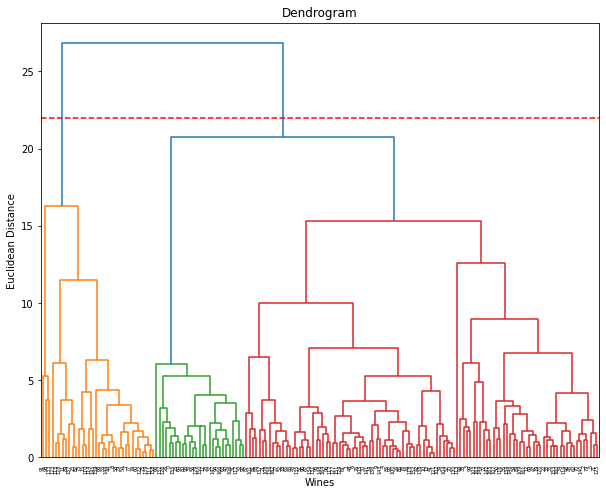

In [23]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(scaled_data,method='ward')
plt.figure(figsize=(10,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(22,0,5000,colors='r',linestyles='dashed')
plt.title('Dendrogram')
plt.xlabel('Wines')
plt.ylabel('Euclidean Distance')
plt.show()

In [24]:
#Using Dendrogram to find the optimal number of clusters

In [25]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y = hc.fit_predict(scaled_data)
y

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [26]:
data['HC_cluster_number']=y
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_number,HC_cluster_number
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0


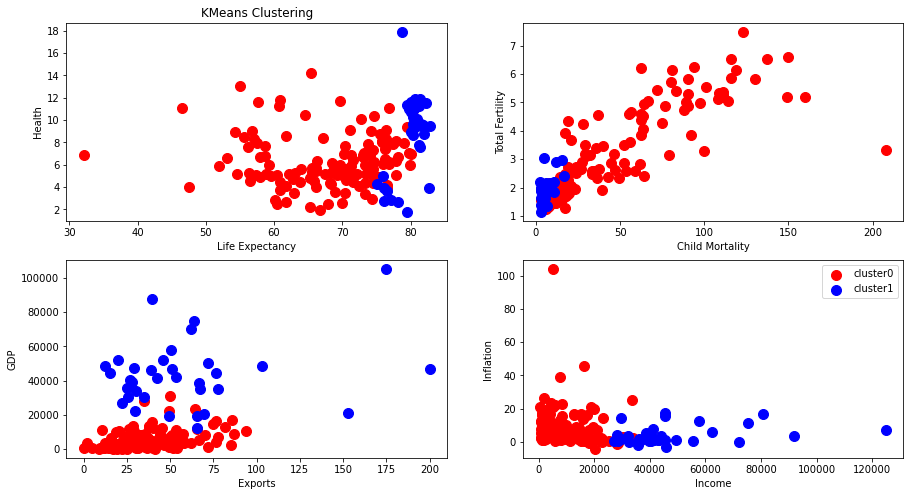

In [27]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.scatter(data[data['HC_cluster_number']==0]['life_expec'],data[data['HC_cluster_number']==0]['health'],s=100,c='red',label='cluster0')
plt.scatter(data[data['HC_cluster_number']==1]['life_expec'],data[data['HC_cluster_number']==1]['health'],s=100,c='blue',label='cluster1')

plt.title('KMeans Clustering')
plt.xlabel('Life Expectancy')
plt.ylabel('Health')

plt.subplot(2,2,2)
plt.scatter(data[data['HC_cluster_number']==0]['child_mort'],data[data['HC_cluster_number']==0]['total_fer'],s=100,c='red',label='cluster0')
plt.scatter(data[data['HC_cluster_number']==1]['child_mort'],data[data['HC_cluster_number']==1]['total_fer'],s=100,c='blue',label='cluster1')

plt.xlabel('Child Mortality')
plt.ylabel('Total Fertility')

plt.subplot(2,2,3)
plt.scatter(data[data['HC_cluster_number']==0]['exports'],data[data['HC_cluster_number']==0]['gdpp'],s=100,c='red',label='cluster0')
plt.scatter(data[data['HC_cluster_number']==1]['exports'],data[data['HC_cluster_number']==1]['gdpp'],s=100,c='blue',label='cluster1')

plt.xlabel('Exports')
plt.ylabel('GDP')

plt.subplot(2,2,4)
plt.scatter(data[data['HC_cluster_number']==0]['income'],data[data['HC_cluster_number']==0]['inflation'],s=100,c='red',label='cluster0')
plt.scatter(data[data['HC_cluster_number']==1]['income'],data[data['HC_cluster_number']==1]['inflation'],s=100,c='blue',label='cluster1')

plt.xlabel('Income')
plt.ylabel('Inflation')

plt.legend()
plt.show()

In [28]:
#After clustering using HC, cluster 0 has worst health and socio-economic factors.
# These countries are in dire need of help.
print(str(np.sum(data['HC_cluster_number']==0)) + ' countries need help')
data[data['HC_cluster_number']==0]['country']

133 countries need help


0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 133, dtype: object

In [29]:
#From the scatter plots, it looks like KMeans has given a better clustering of countries than HC. 
#So, we will take the countries found using KMeans. They are 
data[data['cluster_number']==1]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     